<a href="https://colab.research.google.com/github/varun6579/AIML-1278/blob/main/AIML_LAB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1st Question

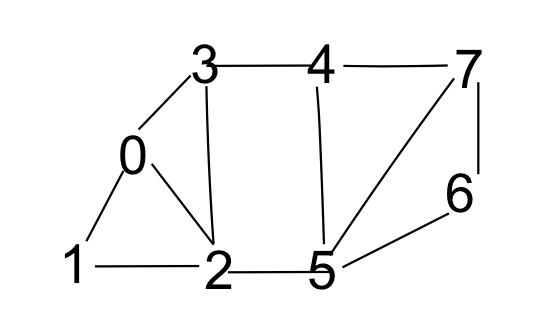

In [1]:
import numpy as np
from queue import Queue
graph={0:[1,2,3],1:[0,2],2:[0,1,3,5],3:[0,2,4],4:[3,5,7],5:[4,6,7],6:[5,7],7:[4,5,6],8:[]}
print("The adjacency List representing the graph is:")
print(graph)
def bfs(graph,source):
  Q=Queue()
  visited_vertices=set()
  Q.put(source)
  visited_vertices.update({source})
  while not Q.empty():
    vertex=Q.get()
    print(vertex,end="-->")
    for u in graph[vertex]:
        if u not in visited_vertices:
           Q.put(u)
           visited_vertices.update({u})
print("BFS traversal of graph with source 0is:")
bfs(graph,0)

The adjacency List representing the graph is:
{0: [1, 2, 3], 1: [0, 2], 2: [0, 1, 3, 5], 3: [0, 2, 4], 4: [3, 5, 7], 5: [4, 6, 7], 6: [5, 7], 7: [4, 5, 6], 8: []}
BFS traversal of graph with source 0is:
0-->1-->2-->3-->5-->4-->6-->7-->

2nd Question

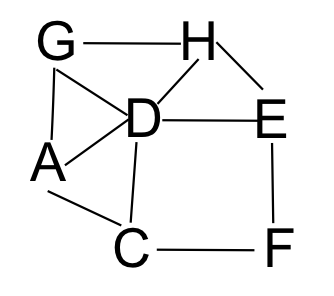

In [2]:
graph1={
      'A':['C','D','G'],
          'B':['A'],
              'C':['A','D','F'],
                  'D':['A','C','E','G','H'],
                      'E':['D','F','H'],
                          'F':['C','E'],
                              'G':['A','D','H'],
                                  'H':['D','E','G'],

                                  }
print("The adjacency List representing the graph is:")
print(graph1)
def dfs(graph,node,visited):
  if node not in visited:
    visited.append(node)
    for k in graph[node]:
      dfs(graph,k,visited)
      return visited
      visited=dfs(graph1,'B',[])
      print(visited)


The adjacency List representing the graph is:
{'A': ['C', 'D', 'G'], 'B': ['A'], 'C': ['A', 'D', 'F'], 'D': ['A', 'C', 'E', 'G', 'H'], 'E': ['D', 'F', 'H'], 'F': ['C', 'E'], 'G': ['A', 'D', 'H'], 'H': ['D', 'E', 'G']}


3rd Question

In [ ]:
from heapq import heappush, heappop
import numpy as np

# Function to calculate the number of misplaced tiles
def misplaced_tiles(puzzle, goal):
    return np.sum(puzzle != goal) - 1 if np.sum(puzzle != goal) > 0 else 0

# Function to get the coordinates of tiles in a 1D array format
def get_positions(puzzle):
    positions = np.zeros(9, dtype=int)
    for idx, tile in enumerate(puzzle):
        positions[tile] = idx
    return positions

# Function to reconstruct the path from the initial state to the goal state
def reconstruct_path(state, idx):
    path = []
    while idx != -1:
        path.append(state[idx]['puzzle'])
        idx = state[idx]['parent']
    return path[::-1]

# A* algorithm using the misplaced tiles heuristic
def a_star_misplaced(puzzle, goal):
    # Possible moves: up, down, left, right
    moves = [('up', [0, 1, 2], -3), ('down', [6, 7, 8], 3),
             ('left', [0, 3, 6], -1), ('right', [2, 5, 8], 1)]

    # State structure: (puzzle, parent index, g(n), h(n))
    dt_state = [('puzzle', list), ('parent', int), ('gn', int), ('hn', int)]

    # Initial state
    initial_hn = misplaced_tiles(get_positions(puzzle), get_positions(goal))
    state = np.array([(puzzle, -1, 0, initial_hn)], dt_state)

    # Priority queue: (f(n), state index)
    priority_queue = [(initial_hn, 0)]

    visited = set()
    visited.add(tuple(puzzle))

    while priority_queue:
        fn, idx = heappop(priority_queue)
        current_puzzle, parent, gn, hn = state[idx]
        current_puzzle = np.array(current_puzzle)

        # If the goal state is reached
        if np.array_equal(current_puzzle, goal):
            return reconstruct_path(state, idx), len(state)

        # Blank tile position
        blank_pos = int(np.where(current_puzzle == 0)[0])

        for move_name, move_pos, move_shift in moves:
            if blank_pos not in move_pos:
                new_puzzle = current_puzzle.copy()
                new_puzzle[blank_pos], new_puzzle[blank_pos + move_shift] = new_puzzle[blank_pos + move_shift], new_puzzle[blank_pos]

                if tuple(new_puzzle) not in visited:
                    visited.add(tuple(new_puzzle))
                    new_gn = gn + 1
                    new_hn = misplaced_tiles(get_positions(new_puzzle), get_positions(goal))
                    new_state = (new_puzzle.tolist(), idx, new_gn, new_hn)
                    state = np.append(state, np.array([new_state], dt_state))
                    heappush(priority_queue, (new_gn + new_hn, len(state) - 1))

    return None, len(state)

# Initial state
puzzle = [4, 1, 5, 3, 0, 7, 8, 6, 2]
# Goal state
goal = [1, 2, 3, 4, 5, 6, 7, 8, 0]

# Solve the puzzle
solution, nodes_visited = a_star_misplaced(puzzle, goal)

if solution:
    for step in solution:
        print(np.array(step).reshape(3, 3))
        print()
    print('Steps to reach goal:', len(solution) - 1)
    print('Total nodes visited:', nodes_visited)
else:
    print("The puzzle is unsolvable")


<ipython-input-3-d5ac73ce6236>:52: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  blank_pos = int(np.where(current_puzzle == 0)[0])
